<a href="https://colab.research.google.com/github/vital-dev-full-stack/data-science/blob/main/Projeto_Deep_Learning_Do_Zero_Python_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [42]:
transform = transforms.ToTensor() #definindo a conversão de iimagem para tensor

trainset = datasets.MNIST('./MNIST_data', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)  # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data', download=True, train=False, transform=transform) #Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)  # Cria um buffer para pegar os dados por partes


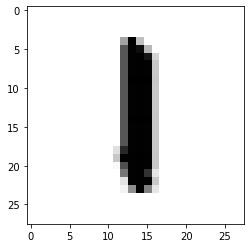

In [43]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [44]:
print(imagens[0].shape) #para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [45]:
class Modelo(nn.Module):
  def __init__(self):
      super(Modelo, self).__init__()
      self.linear1 = nn.Linear(28*28, 128) #camada de entrada , 784 neurônios que se ligam a 128
      self.linear2 = nn.Linear(128, 64) #camada interna 1, 128 neurônios que se ligam a 64
      self.linear3 = nn.Linear(64, 10) #camada interna 2, 64 neurônios que se ligam a 10
      #para a camada de saída não é necessário definir nada pois só precisamos pegar o outpyt da camada interna 2

  def forward(self, X):
      X = F.relu(relu(self.linear1(X))) # função de ativiação da camada de entrada para a camada interna 1
      X = F.relu(relu(self.linear2(X))) # função de ativiação da camada interna 1 para a camada interna 2
      X = self.linear3(X) # função de ativiação da camada interna 2 para a camada de saída, nesse caso f(x) = x
      return F.log_softmax(X,dim=1) #dados utilizados para calcular a perda


In [46]:
def treino(modelo, trainloader, device):

    otimizador = optim.SGD(modelo,parameters(), lr=0.01, momentum=0.5) #define a política de aualização dos pesos e da bias
    inicio - time() #timer para sabermos quanto tempo levou o treino

    criterio = nn.NLLLoss() #definindo o criterio para calcular a perda
    EPOCHS = 10 # numero de epochs que o algoritmo rodará
    modelo.train() # ativando o modo de treinamento do modelo

    for epoch in range(EPOCHS):
        perda_acumulada = 0 # inicilização da perda acumulada da epoch em questtão

        for imagens, etiquetas in trainloarder:

            imagens = imagens.view(imagens.shpae[0], -1) # convertendo as imagens para "vetores" de 28*28 casa para  ficarem compatíveis com
            otimizador.zero_grad() #zerando os gradientes por conta do ciclo anterior 

            output = modelo(imagens.to(device)) # colocando os dados no modelo
            perda_instantanea = criterio(output, etiquetas.to(device)) #calculado a perda da epoch em questão
            
            perda_instantanea.backward() # back propagation a partir da perda

            otimizador.step() #atualizando os pesos e a bias

            perda_acumulada += perda_instantanea.item() # atualização da perda acumulada

        else:
          print("Epoch {} -Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\nTempo de treino (em minutos=", (time()-inicio)/60)

In [47]:
def validacao (modelo, valloader, device):
    contas_corretas, conta_todas = 0,0
    for imagens, etiquetas in valloader:
      for i in range(len(etiquetas)):
        img = imagens[i].vie(1,784)
        # desativar o autograd para acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamento
        with torch.no_grad():
            logps= modelo(img.to(device)) # output do modelo em escala logaritmica

        ps = torch.exp(logps) # converte output para escala normal (lembrando que é um tensor)
        probab = list(ps.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab)) #converte o tensor em um número, no caso, o número que o modelo previu
        etiqueta_certa = etiquetas.numpy()[i]
        if(etiqueta_certa  == etiqueta_pred): # compara a previsão com o valor correto
          contas_corretas += 1
        conta_todas +=1
    print("Total de imagens testadas =", conta_todas)
    print("\nPrevisão do modelo = {}%".format(conta_corretas*100/conta_todas))

In [48]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)